In [1]:
from sklearn.datasets import make_classification  #helps to make a dummy data set.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, X_train_C_level, X_test_C_level = train_test_split(x,y, test_size = 0.3, random_state=42)


In [3]:
print(X_train.shape)    #Data points
print(X_train_C_level.shape)   #class levels

(7000, 2)
(7000,)


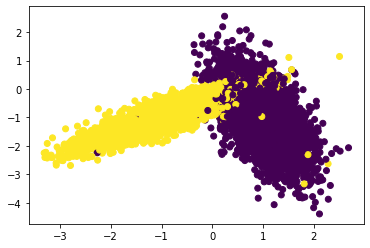

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_train[:,0], X_train[:,1],c= X_train_C_level)
plt.show()

# Implementing Custom RandomSearchCV

In [5]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
folds = 3
K_values_range = (1,50)
n=10

In [6]:
import numpy as np

def Generate_random_numbers(K_values_range, n):
    K_values_lst = sorted(list(set((np.random.uniform(K_values_range[0],K_values_range[1],n)))))
                                                                # set is used to avoid the dublicay in k values.
    K_int_values = []
    for K in K_values_lst:
        K_int_values.append(int(K))
    return K_int_values
# the above class will generate list of 10 number between 0 to 1. 
# the numbers will be different each time its run i.e randomly selecting the K_values.    

In [7]:
K_int_values = Generate_random_numbers(K_values_range,n)
print("Randomly picked numbers are ",K_int_values)

Randomly picked numbers are  [3, 5, 8, 9, 24, 25, 31, 31, 35, 39]


In [8]:
from sklearn.metrics import accuracy_score
def RandomSearchCV(X_train, X_train_C_level, classifier, K_int_values, folds):
    trainscores = []
    testscores = []
    for k in tqdm(K_int_values):
        trainscores_folds = []
        testscores_folds = []
        for fold in range(folds):  # fold = 2 for first iteration.
            groups_X_train = np.array_split(X_train,folds)  #will split X_train 2 equal parts in first iteration
                                                    # note that splitting will be done in order.
            groups_X_train_C_level = np.array_split(X_train_C_level,folds)
                                                    # will split the X_train_C_level in two parts.
            x_Test = groups_X_train[fold]  # this is the second set created during the split
            x_Test_C_level = groups_X_train_C_level[fold]
            groups_X_train.pop(fold)  # remove the data X_Test from  groups_X_train
            groups_X_train_C_level.pop(fold)   # remove the Class level of x_Test from  groups_X_train_C_level
            x_train = np.concatenate(groups_X_train)  # Merginging the the data sets groups_X_train
                    # X_train will contains all the data eexcept x_Test. I will use to train the model
                    # x_test will be used to test the model.
            x_train_C_level = np.concatenate(groups_X_train_C_level) # Merginging the the data sets groups_X_train_C_level
            # Mergenting all the class level groups_X_train_C_level. This Class level set doest not contain the 
            # class level of x_Test.
#training and testing the model below.
            classifier.n_neighbors = k  
            classifier.fit(x_train, x_train_C_level)
            Y_predicted_test = classifier.predict(x_Test)
            testscores_folds.append(accuracy_score(x_Test_C_level,Y_predicted_test))

            Y_predicted_train = classifier.predict(x_train)
            trainscores_folds.append(accuracy_score(x_train_C_level, Y_predicted_train))
# calculating the accuracy of the model in train and test data set.            
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores, testscores

In [9]:
trainscores , testscores = RandomSearchCV(X_train, X_train_C_level, classifier, K_int_values, folds)

100%|███████████████████████████████████████████| 10/10 [00:12<00:00,  1.25s/it]


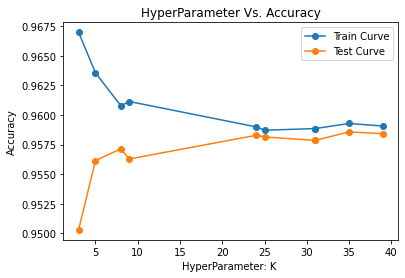

In [10]:
import matplotlib.pyplot as plt
plt.plot(K_int_values, trainscores,"-o",label='Train Curve')
plt.plot(K_int_values, testscores, "-o", label='Test Curve')
plt.xlabel("HyperParameter: K ")
plt.ylabel("Accuracy")
plt.title("HyperParameter Vs. Accuracy")
plt.legend()
plt.show()